In [47]:
import pandas as pd
import numpy as np
import datetime
import warnings
import time
from time import perf_counter
import glob
import tweets_utils
import csv
import importlib
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
%autosave 3600

Autosaving every 3600 seconds


- [Original tweets](#original)
    - [Mentions](#original_mention)
    
    
- [Replies](#replies)
    - [Fake reply (other mentions)](#reply_mention)
    - [Reply to status (original, reply or quote)](#reply_status)
    
    
- [Retweets](#retweets)
    - [Retweet of original](#rt_original)
    - [Retweet in repliy](#rt_reply)
    - [Retweet of  mention](#rt_mention)
    - [Retweet of quote](#rt_quote)
    
    
- [Quotes](#quotes)
    - [Quote of status (original or quote)](#quote_status)
    - [Quote in reply](#quote_reply)
    - [Quote of mention](#quote_mention)
    
    
- [Split check](#split_check)

In [2]:
cols = ["id", "id_str", "user_id", "user_screen_name", "text","in_reply_to_status_id",
        "in_reply_to_status_id_str" ,"in_reply_to_user_id" ,"in_reply_to_user_id_str" ,"in_reply_to_screen_name",
        "rt_created_at", "rt_in_reply_to_status_id", "rt_in_reply_to_user_id", "rt_id", "rt_user_id", "rt_created_at",
        "rt_user_screen_name", "quoted_status_id" ,"quoted_status_text" ,"quoted_status_created_at", "quoted_user_id",
        "quoted_user_created_at", "hashtags", "user_mentions", "urls"]

In [3]:
path = glob.glob("C:/Users/gianl/Desktop/Gi/Supsi/Laura/data/")[0]
df = pd.read_csv(path + "tweets.csv", lineterminator="\n", low_memory=False, usecols=cols)

# Original
<a id="original"/>

In [85]:
original = df[df["in_reply_to_screen_name"].isna() & df["rt_created_at"].isna() & df["quoted_status_id"].isna()]
# original.info()

## Original - Mentions
<a id="original_mention"/>

In [86]:
nan_value = float("NaN")
original_w_mentions = original.replace("[]", nan_value)
original_w_mentions = original_w_mentions[original_w_mentions["user_mentions"].notna()]
# original_w_mentions.info()
# original_w_mentions


In [87]:
value = tweets_utils.print_perc(len(original_w_mentions),len(original))
print(f"Original tweets with mentions are {value}% of total")

Original tweets with mentions are 13.0% of total


# Replies
<a id="replies"/>

In [88]:
reply = df[df["in_reply_to_user_id"].notna() & df["quoted_status_id"].isna()]
# reply.info()

## Fake reply: Mention
<a id="reply_mention"/>

In [89]:
# menzione (@username) ad inizio tweet (sospeso se df["quoted_status_id"].notna())
mentions = reply[reply["in_reply_to_status_id"].isna()]
# mentions.info()
# mentions
reply = reply.drop(mentions.index) # --> esegui cella dopo
original_w_mentions = original_w_mentions.append(mentions) # --> esegui cella dopo
original = original.append(mentions) # --> esegui cella dopo


## Reply to status
<a id="reply_status"/>

In [8]:
# risposte:
# 1281589414838362113 --> risposta A UN POST ORIGINALE, non individuabile
# 1281586483544170496 --> risposta A UNA QUOTE, non individuabile
# 1394609476263718913 --> risposta A UNA RISPOSTA, non individuabile
reply_to_status = reply[reply["in_reply_to_status_id"].notna()]
# reply_to_status.info()
# reply_to_status

### Check rp

In [9]:
len(mentions) + len(reply_to_status) == len(reply)

True

# Retweets
<a id="retweets"/>

In [10]:
retweet = df[df["rt_created_at"].notna()]
# retweet.info(verbose=True, null_counts=True)
# retweet

## Retweet of original
<a id="rt_original"/>

In [11]:
retweet_original = retweet[retweet["rt_in_reply_to_user_id"].isna() & retweet["quoted_status_id"].isna()]
# retweet_original.info(verbose=True, null_counts=True)
# retweet_original

## Retweet of reply
<a id="rt_reply"/>

In [12]:
retweet_in_reply = retweet[retweet["rt_in_reply_to_status_id"].notna()]
# retweet_in_reply.info()
# retweet_in_reply

## Retweet of mention
<a id="rt_mention"/>

In [13]:
retweet_of_mentions = retweet[retweet["rt_in_reply_to_status_id"].isna() & retweet["rt_in_reply_to_user_id"].notna()]
# retweet_of_mentions.info()
# retweet_of_mentions

## Retweet of quote
<a id="rt_quote"/>

In [14]:
retweet_quote = retweet[retweet["quoted_status_id"].notna() & retweet["rt_in_reply_to_user_id"].isna()]
# retweet_quote.info()
# retweet_quote

### Check rt

In [15]:
len(retweet_quote) + len(retweet_of_mentions) + len(retweet_in_reply) + len(retweet_original) == len(retweet)

True

# Quotes
<a id="quotes"/>

In [30]:
quote = df[df["quoted_status_id"].notna() & df["rt_created_at"].isna()]
# quote.info()

## Quote of status
<a id="quote_status"/>

In [31]:
#  quote["quoted_user_created_at"].isna() per le quotes dei post rimossi
quote_original = quote[quote["in_reply_to_screen_name"].isna()]
# quote_original.info()
# quote_original

## Quote in reply
<a id="quote_reply"/>

In [32]:
quote_reply = quote[quote["in_reply_to_screen_name"].notna() & quote["in_reply_to_status_id_str"].notna()]
# quote_reply.info()
# quote_reply

## Quote of mention
<a id="quote_mention"/>

In [33]:
quote_mention = quote[quote["in_reply_to_status_id"].isna() & quote["in_reply_to_user_id"].notna()] 
# quote_mention.info()
# quote_mention

### Check quote

In [34]:
len(quote) == len(quote_original) + len(quote_reply) + len(quote_mention)
# print(len(quote_original) + len(quote_reply))
# print(len(quote))

True

# Split check
<a id="split_check"/>

In [63]:
len(df) == len(reply) + len(retweet) + len(original) + len(quote)

True

# Graphics

In [64]:
tweets_utils.stats(len(df), len(original), len(retweet), len(reply), len(quote))

Number of total tweets: 4053201
Number of original tweets: 752879
Number of retweets: 2414496
Number of replies: 619141
Number of quotes: 266685
Number of original_tweets: 18.57% of total tweets
Number of retweets: 59.57% of total tweets
Number of replies: 15.28% of total tweets
Number of quotes: 6.58% of total tweets
Check sum == len(tweets):  True


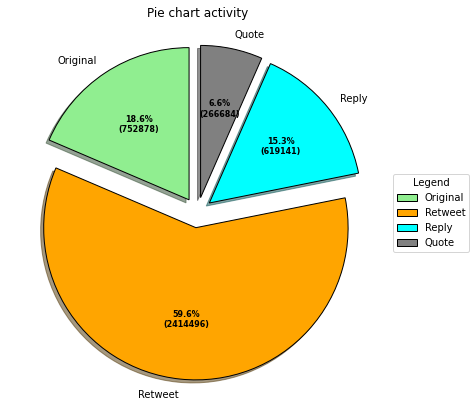

In [65]:
tweets_utils.print_pie_chart4("Pie chart activity", "Original", "Retweet", "Reply", "Quote", 
                              len(original), len(retweet), len(reply), len(quote))

In [76]:
# importlib.reload(tweets_utils)
df_splitted = tweets_utils.split_df(df)

In [90]:
print(len(df_splitted["original"]) == len(original))
print(len(df_splitted['original_mention']) == len(original_w_mentions))
print(len(df_splitted["reply"]) == len(reply))
print(len(df_splitted["reply_to_status"]) == len(reply_to_status))
print(len(df_splitted['retweet']) == len(retweet))
print(len(df_splitted['rt_original']) == len(retweet_original))
print(len(df_splitted['rt_in_reply']) == len(retweet_in_reply))
print(len(df_splitted['rt_mention']) == len(retweet_of_mentions))
print(len(df_splitted['quote']) == len(quote))
print(len(df_splitted['quote_original']) == len(quote_original))
print(len(df_splitted['quote_reply']) == len(quote_reply))
print(len(df_splitted['quote_mention']) == len(quote_mention))

True
True
True
True
True
True
True
True
True
True
True
True
